In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# 1: Preparação e Análise de Dados
## 1.1. Carregamento de Dados 

In [54]:
df = pd.read_csv('data/data_traduct.csv', index_col=0)
df.index.name = 'index'
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
index,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acústico
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acústico
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acústico
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acústico
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acústico


## 1.2. Limpeza e Pré-processamento de Dados:

In [55]:
print('Número de linhas antes do tratamento:', len(df))

df.dropna(inplace=True)

df = df[df['track_genre'] != 'sono']

df = df.drop_duplicates(subset=['track_name', 'artists'], keep='first')

df.reset_index(drop=True, inplace=True)

print('Número de linhas depois do tratamento:', len(df))

Número de linhas antes do tratamento: 114000
Número de linhas depois do tratamento: 80398


## 1.3. Análise Exploratória de Dados

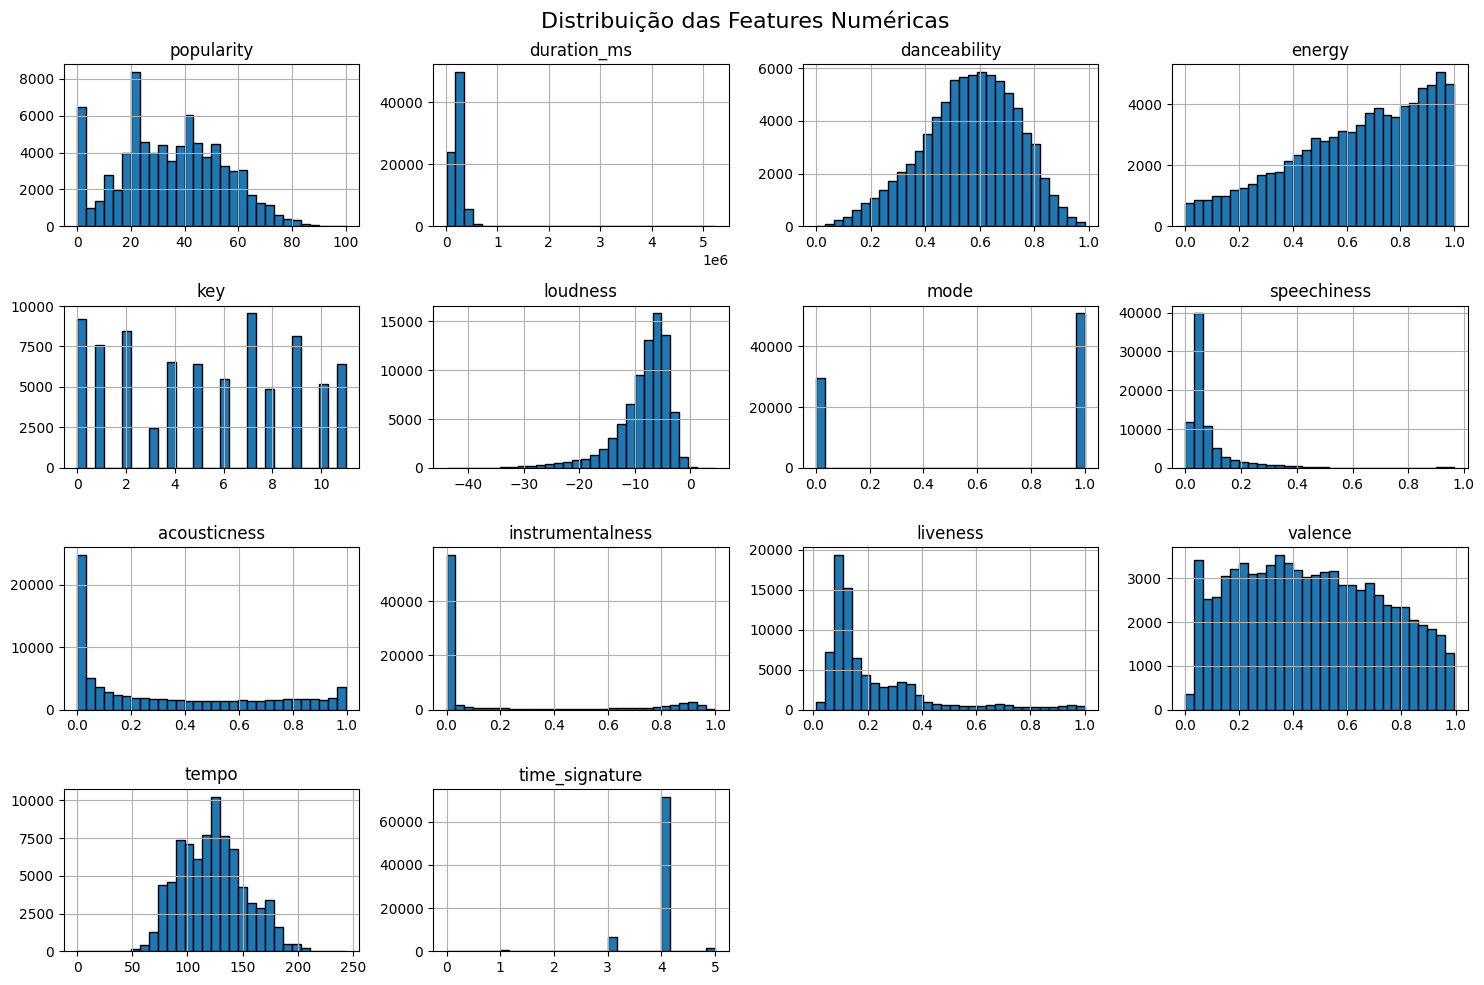

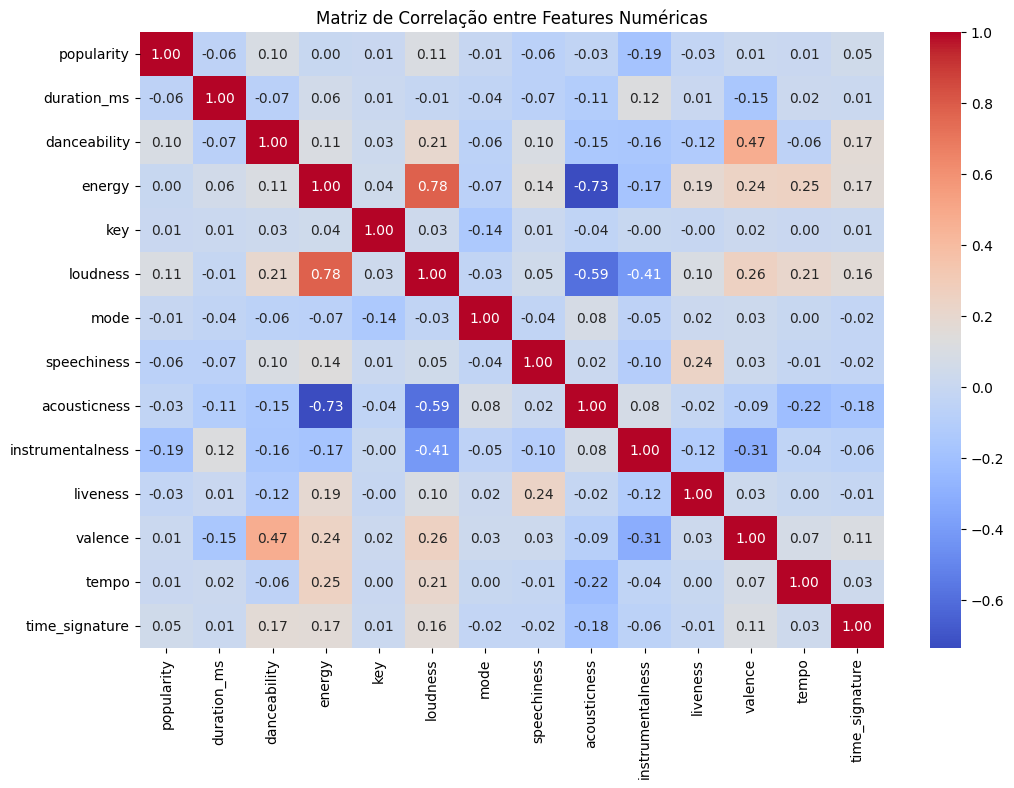

In [56]:
df.describe()

features_numericas = df.select_dtypes(include=np.number).columns

df[features_numericas].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuição das Features Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df[features_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Features Numéricas')
plt.show()

## 1.4. Seleção de Features

### Descrição das Colunas

- **track_id**: O ID do Spotify para a faixa
- **artists**: Os nomes dos artistas que interpretaram a faixa. Se houver mais de um artista, eles são separados por ponto e vírgula (;)
- **album_name**: O nome do álbum no qual a faixa aparece
- **track_name**: Nome da faixa
- **popularity**: A popularidade de uma faixa é um valor entre 0 e 100, sendo 100 a mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções da faixa e quão recentes essas execuções são. Em termos gerais, faixas que estão sendo muito tocadas agora terão maior popularidade do que faixas tocadas muito no passado. Faixas duplicadas (por exemplo, a mesma faixa de um single e de um álbum) são avaliadas separadamente. A popularidade do artista e do álbum é derivada matematicamente da popularidade das faixas.
- **duration_ms**: A duração da faixa em milissegundos
- **explicit**: Se a faixa contém ou não letras explícitas (true = sim, tem; false = não tem OU desconhecido)
- **danceability**: Danceability descreve o quão adequada uma faixa é para dançar, com base em uma combinação de elementos musicais, incluindo o tempo, a estabilidade do ritmo, a força do beat e a regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é mais dançável
- **energy**: Energy é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Normalmente, faixas energéticas são rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto uma preleção de Bach tem baixa energia
- **key**: A tonalidade em que a faixa está. Números inteiros mapeiam para tons usando a notação padrão de Pitch Class. Ex: 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante. Se nenhuma tonalidade for detectada, o valor será -1
- **loudness**: O volume geral da faixa em decibéis (dB)
- **mode**: O modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala de onde o conteúdo melódico foi derivado. Maior é representado por 1 e menor por 0
- **speechiness**: Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter tanto música quanto fala, seja em seções ou camadas, incluindo casos como música rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não relacionadas à fala
- **acousticness**: Uma medida de confiança de 0,0 a 1,0 de se a faixa é acústica. 1,0 representa alta confiança de que a faixa é acústica
- **instrumentalness**: Prediz se uma faixa não contém vocais. Sons como "ooh" e "aah" são tratados como instrumentais nesse contexto. Faixas de rap ou de palavra falada são claramente "vocais". Quanto mais próximo de 1,0 for o valor de instrumentalness, maior a probabilidade de que a faixa não contenha conteúdo vocal
- **liveness**: Detecta a presença de uma audiência na gravação. Valores mais altos de liveness indicam maior probabilidade de que a faixa tenha sido gravada ao vivo. Um valor acima de 0,8 oferece uma forte probabilidade de que a faixa seja ao vivo
- **valence**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, zangadas)
- **tempo**: O tempo estimado geral de uma faixa em batidas por minuto (BPM). Em terminologia musical, o tempo é a velocidade ou o ritmo de uma peça dada e deriva diretamente da duração média das batidas
- **time_signature**: Uma assinatura de tempo estimada. A assinatura de tempo (métrica) é uma convenção de notação para especificar quantas batidas existem em cada compasso (ou medida). A assinatura de tempo varia de 3 a 7, indicando assinaturas de tempo de 3/4 a 7/4
- **track_genre**: O gênero ao qual a faixa pertence


In [57]:
colunas_para_modelo = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness','valence', 'tempo', 'duration_ms'
]

X = df[colunas_para_modelo]

## 1.5. Padronização das Features

In [58]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=colunas_para_modelo)

# 2: Modelagem de Similaridade

## 2.1. Definição da Métrica de Similaridade

Critério|Distância Euclidiana|Similaridade Cosseno
:-:|-|-
Considera magnitude|✅ Sim|❌ Não|
Considera direção/padrão|❌ Não|✅ Sim
Recomendação baseada em padrão|❌ Pode falhar|✅ Excelente escolha
Dados com escala desigual|❌ Problemática|✅ Robusta
Dados esparsos ou vetores longos|❌ Ruim|✅ Muito boa
Recomendação de músicas (conteúdo)|⚠️ Depende|✅ Geralmente preferida

## 2.2 Implementação do Cálculo de Similaridade

In [60]:
modelo_knn = NearestNeighbors(metric='cosine', algorithm='brute')
modelo_knn.fit(X_scaled)

NearestNeighbors(algorithm='brute', metric='cosine')

# 3: Geração de Recomendações

In [61]:
def encontrar_idx_por_input(input_usuario):
    input_usuario = input_usuario.lower()
    
    # Primeiro, tenta encontrar onde tanto música quanto artista batem
    mask_track = df['track_name'].str.lower().apply(lambda x: x in input_usuario)
    mask_artist = df['artists'].str.lower().apply(lambda x: any(artist in input_usuario for artist in x.split(';')))

    combinacao = df[mask_track & mask_artist]
    if not combinacao.empty:
        return combinacao.index[0]
    
    # Se não achar, tenta só pela música
    apenas_musica = df[mask_track]
    if not apenas_musica.empty:
        return apenas_musica.index[0]
    
    # Se ainda não achar, tenta só pelo artista
    apenas_artista = df[mask_artist]
    if not apenas_artista.empty:
        return apenas_artista.index[0]

    return None # Se não encontrar nada

def recomendar_musicas(track_index, n_recomendacoes=10, mesmo_genero=False,
                        generos_favoritos=None, peso_genero=0.75):
    if mesmo_genero:
        genero = df.loc[track_index, 'track_genre']
        filtro_genero = df['track_genre'] == genero
        df_filtrado = df[filtro_genero]
        X_filtrado = X_scaled[filtro_genero]

        idx_relativo = df_filtrado.index.get_loc(track_index)

        modelo_knn.fit(X_filtrado)

        distancias, indices = modelo_knn.kneighbors(X_filtrado.iloc[[idx_relativo]], n_neighbors=n_recomendacoes + 1)
        recomendacoes = df_filtrado.iloc[indices[0][1:]].copy() # Exclui a própria música
        recomendacoes['similaridade'] = 1 - distancias[0][1:]
        
    else:
        distancias, indices = modelo_knn.kneighbors(X_scaled.iloc[[track_index]], n_neighbors=X_scaled.shape[0])
        recomendacoes = df.iloc[indices[0]].copy()
        recomendacoes['similaridade'] = 1 - distancias[0]
        
        # Excluir a própria música (primeira linha)
        recomendacoes = recomendacoes.iloc[1:]
    
    # Se o usuário quer ajustar pela afinidade de gêneros
    if generos_favoritos:
        recomendacoes['ajuste_genero'] = recomendacoes['track_genre'].apply(
            lambda x: 1 + peso_genero if any(genero.lower() in x.lower() for genero in generos_favoritos) else 1
        )
        recomendacoes['similaridade_ajustada'] = recomendacoes['similaridade'] * recomendacoes['ajuste_genero']
        recomendacoes = recomendacoes.sort_values(by='similaridade_ajustada', ascending=False)
        return recomendacoes[['track_name', 'artists', 'track_genre', 'similaridade_ajustada']].head(n_recomendacoes)
    
    else:
        # Sem ajuste de gênero
        recomendacoes = recomendacoes.sort_values(by='similaridade', ascending=False)
        return recomendacoes[['track_name', 'artists', 'track_genre', 'similaridade']].head(n_recomendacoes)

# recomendação por nome e artista
def recomendar_musicas_input(input_usuario, n_recomendacoes=10, mesmo_genero=False,
                             generos_favoritos=None, peso_genero=0.075):
    # Encontrar o índice da música correspondente ao input do usuário
    idx = encontrar_idx_por_input(input_usuario)
    
    if idx is None:
        raise ValueError("Música não encontrada no dataset.")
    
    # Caso contrário, usa a recomendação normal
    return recomendar_musicas(idx, n_recomendacoes, mesmo_genero,
                              generos_favoritos, peso_genero)

# Exemplo de uso:
# recomendar_musicas_input('Incerteza - Na Praia / Ao Vivo')
# ajustar_pesos(encontrar_idx_por_input('Incerteza - Na Praia / Ao Vivo'), ['sertanejo'])
# recomendar_musicas_input('Shape of You Ed Sheeran')
recomendar_musicas_input('Incerteza - Na Praia / Ao Vivo', generos_favoritos=['sertanejo', 'forró', 'pagode'])

,track_name,artists,track_genre,similaridade_ajustada
69948,Só Mais uma Vez - Ao Vivo,Leonardo;Eduardo Costa,sertanejo,1.040939
58735,Cigana - Ao Vivo,Raça Negra,pagode,0.997668
70269,Volta Pra Casa,Lauana Prado,sertanejo,0.993809
44079,Gehraiyaan - Skeletron Remix,OAFF;Savera;Skeletron;Lothika;Ankur Tewari,indiano,0.964577
69734,Volta pro Meu Coração,João Carreiro & Capataz,sertanejo,0.962066
69945,Blusa Vermelha - Ao Vivo,Leonardo;Eduardo Costa,sertanejo,0.958698
25807,Do It All for You,Alan Walker;Trevor Guthrie,eletro,0.955112
44933,L'ultima notte,ARIETE,indie,0.953909
33618,Cava & Camel Blå,Huset,gótico,0.949039
41114,Khaab,Akhil,hip-hop,0.947881
